In [195]:
import pandas as pd

In [196]:
df1 = pd.read_csv('https://raw.githubusercontent.com/r-baid/Schulich_New/main/sales_data.csv')

In [197]:
df1

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [198]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [199]:
df1.head()

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05


In order to find the stats for the given dataset, we can use the describe function, and get an estimate for our data

In [200]:
df1.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In order to get the stats for all the data we can use the below function


In [201]:
df1.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


To verify all the null values in the product columns, we use the below functions

In [202]:
df1[df1['Product'].isnull()] 


,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
18,NaN,NaN,276.27,9.0,2022-01-19
21,NaN,NaN,46.10,14.0,2022-01-22
27,NaN,Region_10,193.85,10.0,2022-01-28
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
997,NaN,Region_7,311.80,13.0,2024-09-24
1021,NaN,Region_2,108.89,7.0,2023-05-22
1024,NaN,Region_7,99.98,8.0,2023-07-21


Now, since I have all the data, I am plotting this to further clean the data and analyze

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt


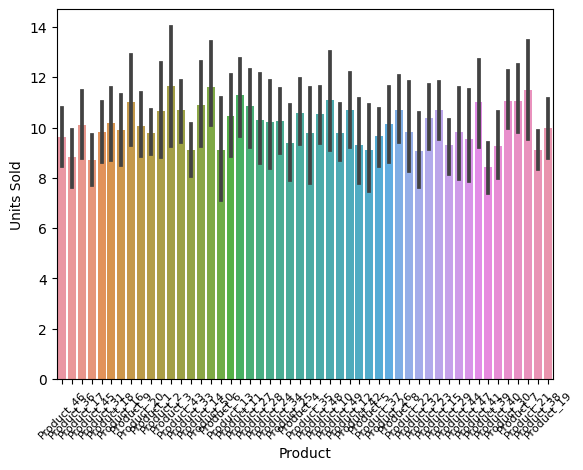

In [204]:
sns.barplot(x='Product', y='Units Sold', data=df1)

tick_locations, tick_labels = plt.xticks()

plt.xticks(tick_locations, tick_labels, fontsize=8, rotation=45)

plt.show()

 We have missing values in the data set, so I am filling the missing values with the most frequent produt, which will help to get the stats


In [205]:
df1['Product'] = df1['Product'].fillna("Product_45")

In [206]:
df1.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,1050,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,131,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


Now, price column also has misssing values, so I am filling the price by all the product price mean.

In [207]:

df1['Price'].fillna(df1.groupby('Product')['Price'].transform('mean'),inplace=True)

In [208]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      946 non-null    object 
 2   Price       1050 non-null   float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Filling all the missing region values with most frequent sold 'Region_9' 

In [209]:
df1['Region'] = df1['Region'].fillna("Region_9")

In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       1050 non-null   float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Filling all the missing Units Sold values with Units sold & Region mean 

In [211]:
df1['Units Sold'].fillna(df1.groupby('Region')['Units Sold'].transform('mean'),inplace=True)

In [212]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       1050 non-null   float64
 3   Units Sold  1050 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [213]:
df1.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,1050,1050,1050.000000,1050.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,131,213,NaN,NaN,2
mean,NaN,NaN,107.600770,10.047921,NaN
std,NaN,NaN,118.119338,3.011271,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.855000,8.000000,NaN
50%,NaN,NaN,83.993750,10.000000,NaN
75%,NaN,NaN,138.106250,12.000000,NaN


Let's remove the outliers to get the clear picture of our data.

In [214]:
df1.drop(969, axis=0, inplace=True)

Now, I am making some histogram, to analyze the data, to conclude and to recommend my findings.

From the below graph, I can see that product prices which are less than 100 has more count than product which is more than 100.

<Axes: xlabel='Price', ylabel='Count'>

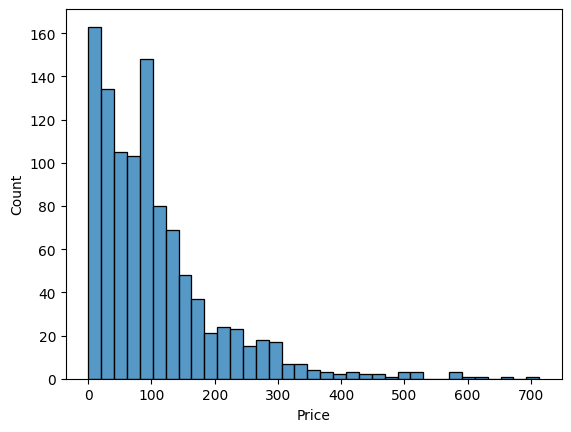

In [215]:
sns.histplot(df1['Price'])

Now, I am trying to figure out the relation between Price and Units Sold.

<Axes: xlabel='Units Sold', ylabel='Price'>

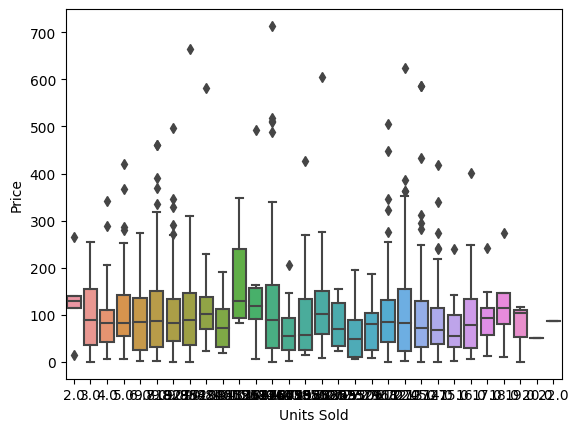

In [216]:
sns.boxplot(data=df1, x="Units Sold", y='Price')

The above graph has Multiple Outliers which won't help in making my analysis. So I am removing anything which has price more than 400.

In [217]:
df1.drop(df1[df1['Price']>400].index, axis=0, inplace=True)

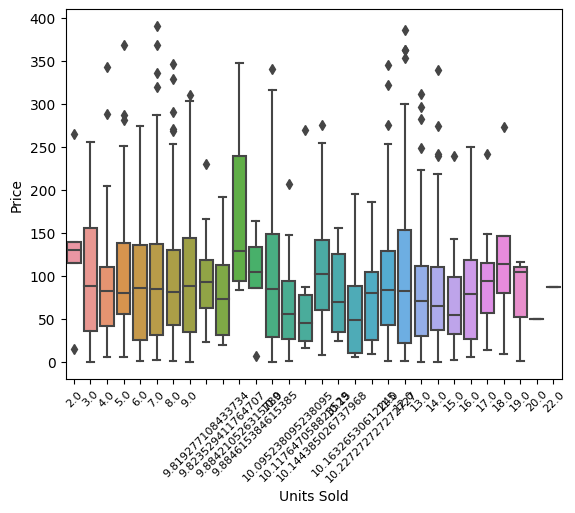

In [218]:
sns.boxplot(data=df1, x="Units Sold", y='Price')
tick_locations, tick_labels = plt.xticks()

plt.xticks(tick_locations, tick_labels, fontsize=8, rotation=45)

plt.show()

It's difficult to analyze from the above graph, So I am using the below graph for my analysis

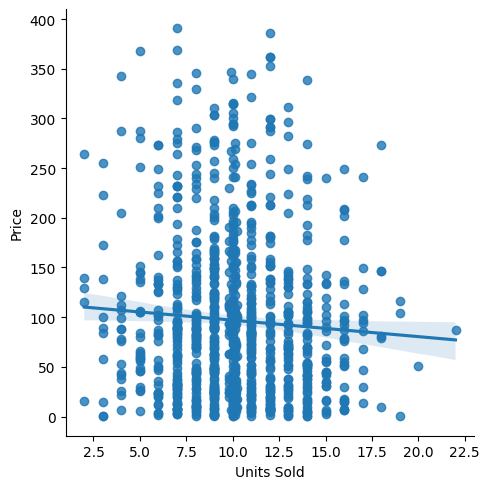

In [219]:
sns.lmplot(data=df1, x= 'Units Sold', y='Price',fit_reg=True)

So, Now I can say that it depends on the product but anyway, in general, if the price of the product is around 110 (Or in between 100-150) more units are sold.

Below code is written to determine the relation between Price and Region

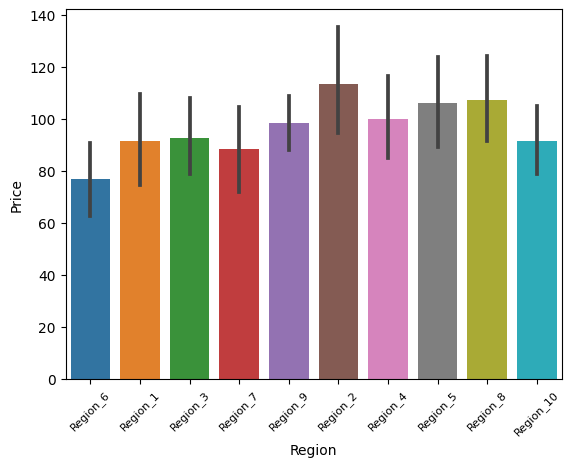

In [220]:
sns.barplot(x='Region', y='Price', data=df1)

tick_locations, tick_labels = plt.xticks()

plt.xticks(tick_locations, tick_labels, fontsize=8, rotation=45)

plt.show()

From the above graph, it is evident products can be sold easily above 80, but in region 6, we should introduce some offers to increase the sale and then increase the price again, to raise popularity of the products. I have made more graph to offer more insights about this data

From the below graph we can say that almost in all region units sold is 10.(Average) 

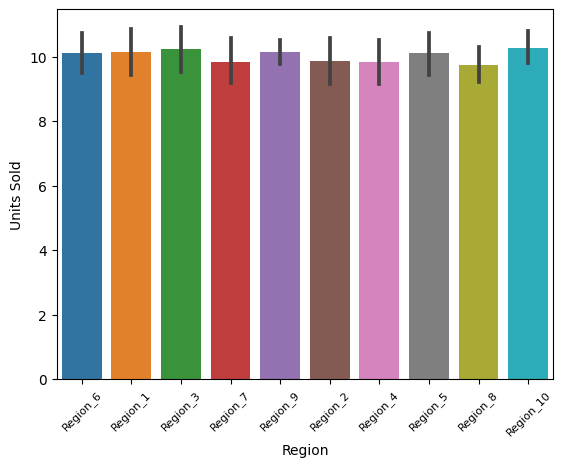

In [221]:
sns.barplot(x='Region', y='Units Sold', data=df1)

tick_locations, tick_labels = plt.xticks()

plt.xticks(tick_locations, tick_labels, fontsize=8, rotation=45)

plt.show()

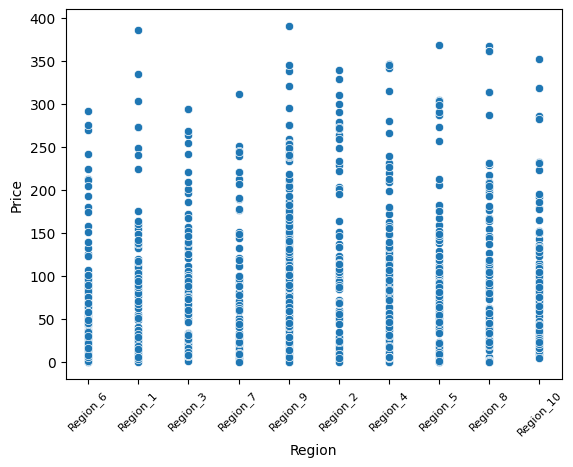

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Region', y='Price', data=df1)
tick_locations, tick_labels = plt.xticks()

plt.xticks(tick_locations, tick_labels, fontsize=8, rotation=45)

plt.show()

The above graph give us the clear picture of relation of price and Region. Products worth less than 200 are easily sold in all the region.

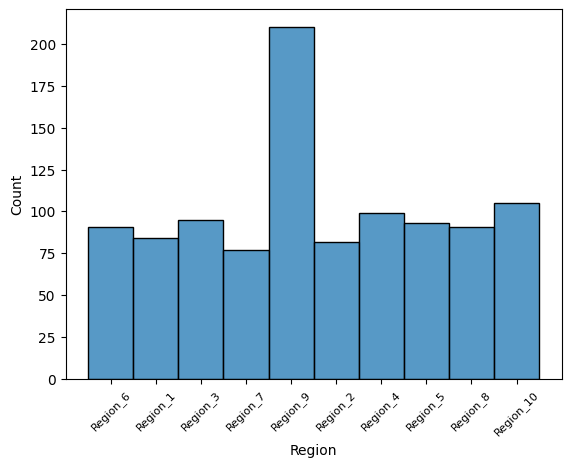

In [223]:
sns.histplot(df1['Region'])
tick_locations, tick_labels = plt.xticks()

plt.xticks(tick_locations, tick_labels, fontsize=8, rotation=45)


plt.show()

From the above graph, in almost all the region total order number are approx 100, except in region 9 which has more than 200.

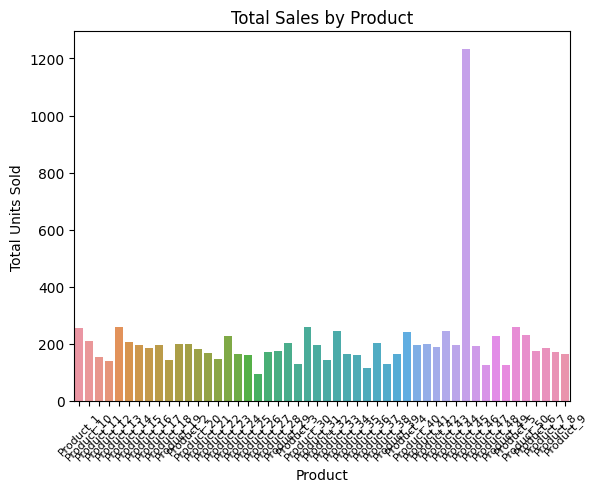

In [225]:
product_sales = df1.groupby('Product')['Units Sold'].sum().reset_index()

sns.barplot(x='Product', y='Units Sold', data=product_sales)
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.title('Total Sales by Product')
tick_locations, tick_labels = plt.xticks()

plt.xticks(tick_locations, tick_labels, fontsize=8, rotation=45)

plt.show()

Based on my analysis, Following are my answers:

1) Based on the analysis conducted on the provided data, here are my conclusion:

   a) The sales performance of various products varies across regions. Some products perform well in specific regions, while others have more consistent sales across regions.
   
   b) Region_1, Region_3 and Region_10 appears to be the top-performing regions in terms of sales, as they have consistently higher 'Units Sold' numbers compared to other regions.

   c)Product_45 is the top-performing products in terms of sales, as they consistently achieve higher sales volumes compared to other products.

2) Recommendations for the business:

      a) Focus on the top-performing products, by allocating more resources for marketing and inventory management to further increase their sales.

      b) Consider expanding operations in Region_1, Region_3 and Region_10 as these regions consistently show higher sales performance. This could involve targeted marketing campaigns and increased product availability.
      
      c) Target Region_9 to clear the inventory or to boost sales as it has the most number of Sales.

      d) For some time, reduce the margin and decrease the price of some products to around ~107(Mean) to increase sales.

3) Data cleaning approach:

   a) Firstly, I imported the dataset and got the description of all the data, such as type of data, unique data, data count, mean, median standard deviation etc.

   b) Checked for missing values: The presence of missing values can impact the analysis and interpretation of the data. So, I replaced the     missing values with the most frequent element of that column.
   
   c) Cleaned inconsistent or erroneous values: Inspected the data for any outliers or values that seemed unrealistic or incorrect.

The cleaning techniques used were aimed to ensure the accuracy and reliability of the data for analysis.

I used the above cleaning data based on the graph I created, for example in the Graph: Price vs Unit sold I removed any outlier above the price 400 to better visualize the data and provide my analysis.


